<a href="https://colab.research.google.com/github/narrasriram/EMOTION-RECOGNITION-USING-FINE-TUNED-MODELS-ERFM-/blob/main/Colab%20Model%20building%20Files/Classification/Models%20on%20ISEAR%20Dataset/Naive%20Bayes/ISEAR_NaiveBayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  
# -*- coding: utf-8 -*-

# Author: Sriram Narra
# Course: CS 842
# Date: Apr 15, 2021
# Project Name: Emotion Recognition using Fine-tuned Models(ERFM)
# Description: This notebook builds a Navive Bayes Model on ISEAR 
#              Dataset and checks the performance of the 
#              model with various model evaluation metrics
# --------------------------------------------------------------------------------

Install the libraries

In [1]:
from pandas import DataFrame
import textblob
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mount Google Drive

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Load the CSV file into a Dataframe

In [3]:
data_frame=pd.read_csv('/content/drive/MyDrive/Data Science Project/Datasets/ISEAR/Isear.csv')

In [4]:
data_frame.head()

,Emotion,Text
0,anger,When a boy tried to fool me so he would be OK ...
1,anger,I felt anger when I saw that I was being misle...
2,anger,Once a friend had pushed me and I had fallen o...
3,anger,When I was misleaded by a person who assured t...
4,anger,I don't use to lie to my parets about what I d...


Subjectivity Score Retrieval Function Declaration

In [5]:
def getScore(data):
  return TextBlob(data).sentiment.subjectivity

In [6]:
data_frame["Subj_Score"] = data_frame["Text"].apply(getScore)

In [7]:
data_frame.tail()

,Emotion,Text,Subj_Score
7661,shame,I felt this when I was copying homework for on...,0.000000
7662,shame,I experienced long ago when I was sightseeing ...,0.475000
7663,shame,Failing an examn because I did not work hard e...,0.520833
7664,shame,I was talking to a friend of mine about our pa...,0.000000
7665,shame,Arguing with a friend over politics. She was m...,0.300000


In [8]:
print(data_frame["Emotion"].value_counts())

sadness    1096
anger      1096
shame      1096
disgust    1096
fear       1095
joy        1094
guilt      1093
Name: Emotion, dtype: int64


Balacnced/Imbalanced Data Analysis

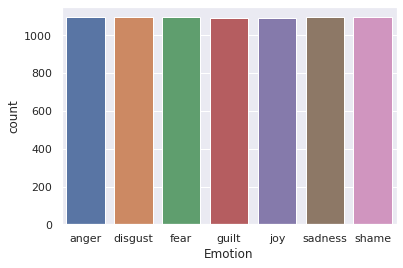

In [9]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Emotion", data=data_frame)

Missing Values Analysis

In [10]:
data_frame.isnull().values.any()

False

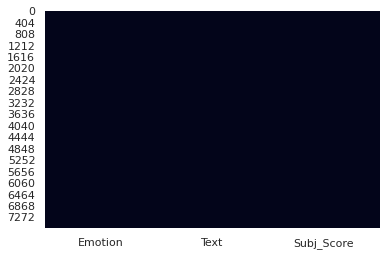

In [11]:
sns.heatmap(data_frame.isnull(), cbar=False)

In [12]:
len(data_frame)

7666

Shuffle the dataset

In [13]:
data_frame = data_frame.sample(frac=1).reset_index(drop=True)

Data Transforming

In [14]:
req_sentences_list = []
for i in range(0, len(data_frame)):
    substituted_sentence = re.sub('[^a-zA-Z]', ' ', data_frame['Text'][i])
    # Take the lower case alphabets of every sentence
    lower_cased_sentence = substituted_sentence.lower()

    # Split every word in the sentence
    splitted_sentence = lower_cased_sentence.split()

    # Stem every word to its root word
    ps = PorterStemmer()
    stemmed_sentence = [ps.stem(each_word) for each_word in splitted_sentence if not each_word in set(stopwords.words('english'))]

    # Join the divided words
    cleaned_sentence = ' '.join(stemmed_sentence)

    # Append the cleaned sentence to the list
    req_sentences_list.append(cleaned_sentence)

Label Encoding of Emotion Labels

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['Emotion'] = le.fit_transform(data_frame['Emotion'])

Creation of Bag of Words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
feature_count_calc = CountVectorizer(max_features = 1589)
X = feature_count_calc.fit_transform(req_sentences_list).toarray()
y = data_frame.iloc[:, 0].values

Scale the features onto a single scale

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Fitting Naive Bayes to the Training set

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Predicting the Test set results

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
print(le.inverse_transform(y_pred))

['fear' 'guilt' 'shame' ... 'guilt' 'sadness' 'fear']


Weighted Accuracy Score

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.5605640594443216

Weighted Precision, Recall, F1 Score

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.5657322427225111, 0.5619295958279009, 0.5630499919130493, None)

Stylized Confusion Matrix.
Ref: https://www.kaggle.com/agungor2/various-confusion-matrix-plots

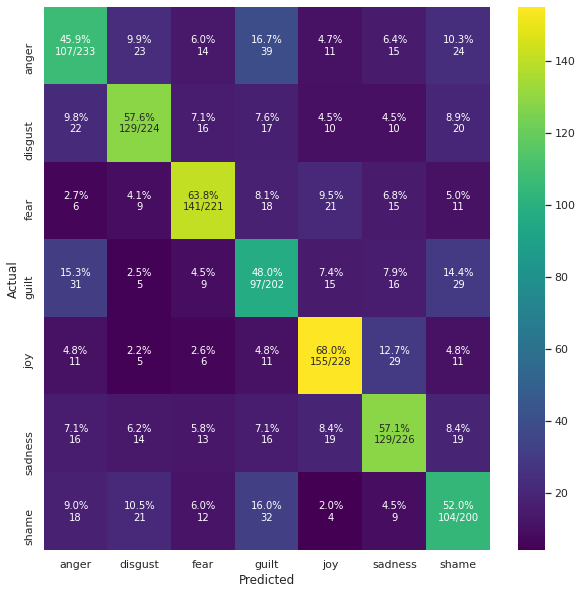

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap="viridis",  annot=annot, fmt='', ax=ax)
    
plot_cm(le.inverse_transform(y_test), le.inverse_transform(y_pred))

5- Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
metric_scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Average Score:",metric_scores.mean())
print("Average Standard Deviation:",metric_scores.std())

Average Score: 0.5368561631906359
Average Standard Deviation: 0.012873584053405348


In [ ]:
list(le.inverse_transform([0,1,2,3,4,5,6]))

['anger', 'disgust', 'fear', 'guilt', 'joy', 'sadness', 'shame']

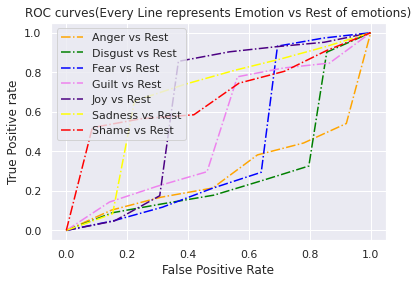

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

false_positive_rate = {}
true_positive_rate = {}
threshold ={}


number_of_classes = 7

for i in range(number_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = roc_curve(y_test, y_pred, pos_label=i)
   
plt.plot(false_positive_rate[0], true_positive_rate[0], linestyle='-.',color='orange', label='Anger vs Rest')
plt.plot(false_positive_rate[1], true_positive_rate[1], linestyle='-.',color='green', label='Disgust vs Rest')
plt.plot(false_positive_rate[2], true_positive_rate[2], linestyle='-.',color='blue', label='Fear vs Rest')
plt.plot(false_positive_rate[3], true_positive_rate[3], linestyle='-.',color='violet', label='Guilt vs Rest')
plt.plot(false_positive_rate[4], true_positive_rate[4], linestyle='-.',color='indigo', label='Joy vs Rest')
plt.plot(false_positive_rate[5], true_positive_rate[5], linestyle='-.',color='yellow', label='Sadness vs Rest')
plt.plot(false_positive_rate[6], true_positive_rate[6], linestyle='-.',color='red', label='Shame vs Rest')
plt.title('ROC curves(Every Line represents Emotion vs Rest of emotions)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=350);

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(y_test)

y_test = lb.transform(y_test)
y_pred = lb.transform(y_pred)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred, multi_class='ovo')

0.7438207107386801

In [ ]:
roc_auc_score(y_test, y_pred, average = 'weighted', multi_class='ovr')

0.7447707671156347

References:

1. Stylized Confusion Matrix - https://www.kaggle.com/agungor2/various-confusion-matrix-plots

2.  Edward Loper and Steven Bird. “NLTK: The Natural Language Toolkit”. In:CoRRcs.CL/0205028(2002).url:http://dblp.uni- trier.de/db/journals/corr/corr0205.html#cs- CL-0205028

3. Guido Van Rossum and Fred L. Drake.Python 3 Reference Manual. Scotts Valley, CA: CreateS-pace, 2009.isbn: 1441412697.

4.  F. Pedregosa et al. “Scikit-learn: Machine Learning in Python”. In:Journal of Machine LearningResearch12 (2011), pp. 2825–2830.

5. Conversion of Input into Word Features - https://github.com/narrasriram/data_science/blob/master/machine_learning/natural%20language%20processing/sentiment%20classification/natural_language_processing.py